<a href="https://colab.research.google.com/github/0xVolt/cemetery-of-culture/blob/main/year-3/neural-networks/5-cnns/complete-cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using a ConvNet training it on the CIFAR10 dataset

The CIFAR10 dataset contains 60,000 32x32 3 channel images and is used largely to train ConvNets for Image Classification. We import this dataset from TensorFlow. To know more about the CIFAR10 and the more advanced CIFAR100 datasets, visit [this website](https://www.cs.toronto.edu/~kriz/cifar.html).

## Structuring PyTorch script files
Here's a general purpose template for how to implement models using the PyTorch library.
- Import dependencies. Some essential libraries include,
    - For data manipulation
        1. `numpy as np`
    - For plotting
        2. `matplotlib.pyplot as plt`
    - To build the neural network
        3. `torch`
        4. `torch.nn as nn`
        4. `torch.nn.functional as F`
    - To download the dataset (optional)
        5. `torchvision`
        5. `torchvision.transforms as transforms`
- Make sure you've got gpu support, if not cpu. You configure the device like so,
    ```py
    device = torch.device('cuda' if torch.cuda.isavailable() else 'cpu')
    ```
- Define the hyper-parameters for the model to be implemented. These include,
   1. Number of epochs
   2. Batch size
   3. Learning rate
- Load the dataset (either by the modules imported or download).
- Load the dataloader so we can use batch optimisation and training.
- Define the target classes.
- Define a class for the ConvNet.
- Create the model. We do this by calling the class we defined as,
    ```py
    model = ConvNet.to(device)
    ```
- Create the loss. For a multiclass classification, we use `nn.CrossEntropyLoss()`
- Create optimiser. For this model we'll use the Stochastic Gradient Descent optimisation algorithm from `torch.optim.SGD(model.parameters, lr=learning_rate)`
- Now comes your run of the mill training loop that loops over number of epochs and then in each epoch, loop through the batches. After training we display that the training of the model is complete.
- Use `train_loader` to iterate through the batches and display the accuracy with which each of the classes were predicted.

## Code

Files already downloaded and verified
Files already downloaded and verified


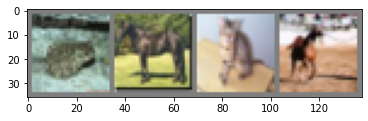

Epoch [1/10], Step [2000/12500], Loss: 2.3501
Epoch [1/10], Step [4000/12500], Loss: 2.3122
Epoch [1/10], Step [6000/12500], Loss: 2.3059
Epoch [1/10], Step [8000/12500], Loss: 2.2806
Epoch [1/10], Step [10000/12500], Loss: 2.3403
Epoch [1/10], Step [12000/12500], Loss: 1.4777
Epoch [2/10], Step [2000/12500], Loss: 2.4390
Epoch [2/10], Step [4000/12500], Loss: 1.5907
Epoch [2/10], Step [6000/12500], Loss: 2.3295
Epoch [2/10], Step [8000/12500], Loss: 1.5652
Epoch [2/10], Step [10000/12500], Loss: 2.0319
Epoch [2/10], Step [12000/12500], Loss: 1.5019
Epoch [3/10], Step [2000/12500], Loss: 2.1923
Epoch [3/10], Step [4000/12500], Loss: 1.0695
Epoch [3/10], Step [6000/12500], Loss: 1.5076
Epoch [3/10], Step [8000/12500], Loss: 1.2977
Epoch [3/10], Step [10000/12500], Loss: 1.1462
Epoch [3/10], Step [12000/12500], Loss: 1.4280
Epoch [4/10], Step [2000/12500], Loss: 1.8080
Epoch [4/10], Step [4000/12500], Loss: 1.8647
Epoch [4/10], Step [6000/12500], Loss: 1.1538
Epoch [4/10], Step [8000/125

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 10
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))


class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print(
                f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')
